# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

In [2]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\211122IF_211101exp_Mdc1ab_45h\cov3_Mdc1-568 H3K27me3-488 PolS5-647\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [3]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\211125IF_211121exp_Mdc1ab_45h\cov2_Mdc1-568 H3K27me3-488 PolS5-647\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [4]:
combined_df = pd.concat([exp1_df,exp2_df])

len(combined_df)


measurement_for_all_fov_df = combined_df

# 3. Post-hoc analysis examples

In [5]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Mdc1_fixed_analysis'

analysis_savename = 'mdc-568_h3k27me3_pol2_analyzed.xlsx'

In [7]:
# remove the bad cell that has no Pol2 signal
analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

len(analysis_df)

#analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

564

In [8]:
# remove the bad cell that has no Pol2 signal
#analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

# for total incorporated chr
analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_Pol2S5'].mean())


# for subset control
analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_subset_control_Pol2S5'].mean())



# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_H3K27me3'] = analysis_df['ave_intensity_incorporated_chr_H3K27me3']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K27me3']
print(analysis_df['normalized_inc_H3K27me3'].mean())


# for subset control
analysis_df['normalized_subset_control_H3K27me3']=analysis_df['ave_intensity_subset_control_chr_H3K27me3']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K27me3']
print(analysis_df['normalized_subset_control_H3K27me3'].mean())






# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_inc_Mdc1'].mean())


# for subset control
analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_subset_control_Mdc1'].mean())





# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_inc_dna'].mean())


# for subset control
analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_subset_control_dna'].mean())

0.7506099877137081
1.0156007286873898
1.0702446066205384
0.992930081967619
5.182352676791986
0.9961781056970261
1.1298723881884547
1.0056843630295231


In [9]:
analysis_df

,Unnamed: 0,exp_name,position_id,cell_id,cell_xyz_coord,area_incorporated_chr,area_h2ax_within_incorporated_chr,area_less_h2ax_within_incorporated_chr,area_control_chr,area_nucleo-excluded_control_chr,...,ave_intensity_h2ax_pos_incorporated_chr_Pol2S5,ave_intensity_h2ax_less_incorporated_chr_Pol2S5,normalized_inc_Pol2S5,normalized_subset_control_Pol2S5,normalized_inc_H3K27me3,normalized_subset_control_H3K27me3,normalized_inc_Mdc1,normalized_subset_control_Mdc1,normalized_inc_dna,normalized_subset_control_dna
0,0,cov3_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,6,"[[1072, 1049], 4]",1100,44,1056,21804,5311,...,NaN,715.105937,0.674154,0.980039,1.290331,1.119074,4.734387,0.874302,0.920664,0.819612
1,0,cov3_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,16,"[[1488, 1692], 6]",469,0,469,37446,8779,...,NaN,1942.521652,2.276958,0.824895,0.869638,1.058275,4.095347,1.267839,1.239617,1.154156
2,0,cov3_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,3,"[[1038, 996], 4]",554,42,512,11939,3522,...,NaN,779.533734,0.687205,1.147893,1.424646,1.319359,8.423556,1.015870,1.016765,0.925646
3,0,cov3_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,18,"[[819, 1405], 4]",448,35,413,13074,3502,...,NaN,404.501343,0.339175,1.446917,1.615610,1.330499,13.680087,1.484732,0.993938,0.783361
4,0,cov3_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,6,"[[1129, 951], 4]",681,95,586,11134,3266,...,NaN,666.628807,0.617157,1.088743,1.691066,1.138696,8.920842,0.800343,0.936407,0.849092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,cov2_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,17,"[[967, 302], 4]",119,0,119,15251,4174,...,NaN,551.756837,0.710480,1.175018,0.484914,1.056653,2.844211,1.239252,0.789375,1.170297
313,0,cov2_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,1,"[[1300, 534], 4]",176,6,170,21324,5545,...,NaN,130.927272,0.173972,0.729147,0.999929,0.714037,2.581779,1.242338,1.494290,1.087873
314,0,cov2_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,3,"[[798, 517], 4]",114,0,114,17301,4457,...,NaN,539.762393,0.632998,0.777218,0.682172,1.238075,3.296538,0.738792,1.189925,0.884489
315,0,cov2_Mdc1-568 H3K27me3-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K27me3-488 RNApol...,7,"[[1671, 1173], 3]",100,0,100,18643,5309,...,NaN,182.262648,0.229379,1.276282,0.858756,1.401723,3.000744,0.736676,1.685789,0.754598


In [10]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'

analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

MW comparision: 2.0210292605988525e-12


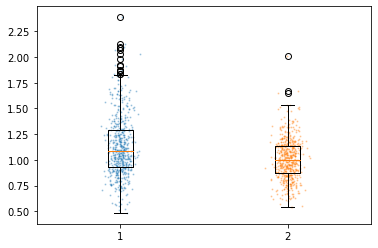

In [11]:
# for dna

# 
g1 = analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 3.154352526633029e-185


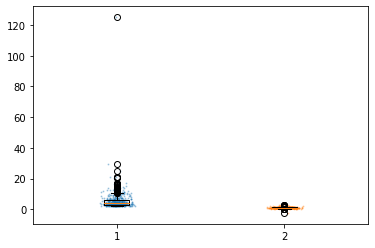

In [12]:
# for mdc1

# 
g1 = analysis_df['normalized_inc_Mdc1']
g2 = analysis_df['normalized_subset_control_Mdc1']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.1287450941607487e-53


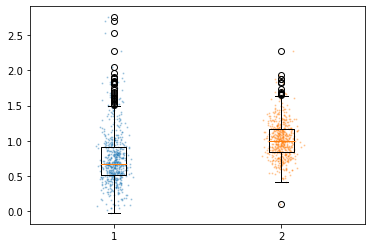

In [13]:
# For Pol2S5
g1 = analysis_df['normalized_inc_Pol2S5']
g2 = analysis_df['normalized_subset_control_Pol2S5']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 6.147160897023245e-59


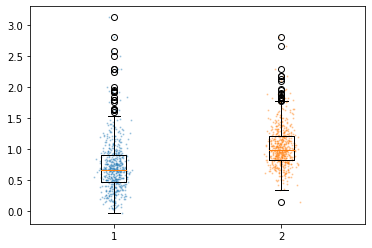

In [14]:
# For Pol2S5 norm to dna
g1 = analysis_df['normalized_inc_Pol2S5']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_Pol2S5']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.003722980349079832


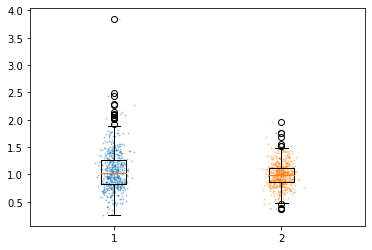

In [16]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K27me3']
g2 = analysis_df['normalized_subset_control_H3K27me3']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.046020238231933845


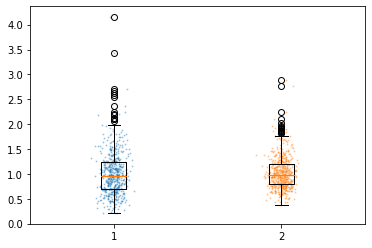

In [17]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K27me3']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_H3K27me3']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

In [18]:
from scipy import stats
stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K27me3'])

SpearmanrResult(correlation=0.156245307420204, pvalue=0.00019508956136794688)

SpearmanrResult(correlation=0.156245307420204, pvalue=0.00019508956136794688)

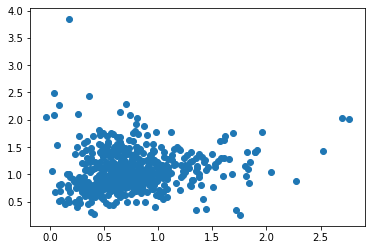

In [20]:
plt.scatter(x= analysis_df['normalized_inc_Pol2S5'], y =analysis_df['normalized_inc_H3K27me3'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K27me3'])

SpearmanrResult(correlation=0.156245307420204, pvalue=0.00019508956136794688)

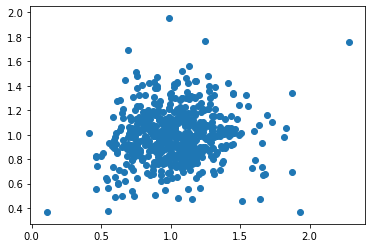

In [21]:
plt.scatter(x= analysis_df['normalized_subset_control_Pol2S5'], y =analysis_df['normalized_subset_control_H3K27me3'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K27me3'])

In [22]:
stats.spearmanr(analysis_df['normalized_subset_control_Pol2S5'], analysis_df['normalized_subset_control_H3K27me3'])

SpearmanrResult(correlation=0.10751946511362691, pvalue=0.010612931742866687)